# Lab 1: BC4 and your first neural network

In this lab session we aim to accomplish the following:

- Set up a Colaboratory account for playing around with PyTorch interactively.
- Show you the basics of PyTorch through the implementation of a multilayer perceptron/fully connected deep network.
- Introduce you to BlueCrystal 4, showing you how to run interactive sessions on a compute node.
- Introduce you to Tensorboard for visualising metrics throughout the training process.

First we will introduce you to PyTorch inside a Colaboratory notebook (a Google hosted version of Jupyter notebooks), ideal for playing around and exploring the library. Next we will show you how to build a deep network and train it inside of a notebook on Colaboratory. We will then port the code out of the notebook into a script and run it on a GPU on BC4. Finally, we will add logging of performance metrics to the code to enable you track the progress of training the network.

### Contents
1. [Iris Flower Dataset - A 3-way classification problem](#Iris-Flower-Dataset)
2. [Colaboratory notebooks](#Colaboratory-notebooks)
3. [Intro to PyTorch](#PyTorch-Intro)
4. [Your first DNN](#Building-Your-First-Fully-Connected-Network)
5. [Porting the network to a script and running on BC4](#Porting-Your-Network-To-BC4)
6. [Logging metrics with TensorBoard](#Logging-Performance-Metrics)
7. [Optional Extension: Implementing library functions](#Optional-Extension:-Implementing-library-functions)


## Iris Flower Dataset

In 1936, British geneticist Ronald Fisher collected the Iris Flower Dataset [Wiki](https://en.wikipedia.org/wiki/Iris_flower_data_set)

It contains 150 samples of three types of Iris flowers. Each sample is described using four dimensions: the height and width of its sepals and petals. Follow the wikipedia link above to look at the Iris dataset file and understand the various dimensions.

The aim of this lab is to classify the Iris flow dataset, using a fully connected *deep* network. We will actually build a shallow one of 2 layers only, but the principles extend to any depth. 

--- 
## Colaboratory notebooks

Head over to https://colab.research.google.com and sign in with a Google account.

You should see something similar to the image below:

<img src="./media/colaboratory.png" width="900">

Go to *File > New Python 3 Notebook*, it should prompt you to sign in with your google account.

In the first cell type the following

```python
import torch
torch.__version__
```

and click the play button to the left of the cell to run the code (Alternatively, pressing `<Ctrl>-<Enter>` will also run the code).

<img src="./media/colaboratory-notebook.png" width="700">

You should get *at least* version `1.1.0`, more likely you will get `1.6.0`.

You can add new cells to the notebook by clicking the *+ Code* button in the toolbar.

--- 
## PyTorch Intro

In this section we will introduce you in a hands on way to PyTorch. Keep this notebook open alongside your Colaboratory notebook and for each code cell in this notebook, you should write out the code in the Colaboratory notebook, executing the code as you progress and ensuring you get the same output as listed below the relevant cell in this notebook.

PyTorch is a lot like numpy, it has a notion of an N-dimensional array like in numpy, but it is instead called a tensor. Tensors generalise scalar, vectors, and matrices. A scalar is a 0D tensor, a vector is a 1D tensor, and a matrix is a 2D tensor.

In [ ]:
import torch
import numpy as np

array_np = np.array([[1, 2, 3],
                     [4, 5, 6]])
array_pytorch = torch.tensor([[1, 2, 3],
                              [4, 5, 6]])
print(array_np)
print(array_pytorch)

[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]])


Now we'll demonstrate some of the operations defined on tensors. Check out the docs for [`torch.Tensor`](https://pytorch.org/docs/stable/tensors.html) and [`torch`](https://pytorch.org/docs/stable/torch.html) for details. 

In [ ]:
x = torch.tensor([1, 2, 3], dtype=torch.float32)
y = torch.tensor([4, 5, 6], dtype=torch.float32)

In [ ]:
x.shape  # what are the dimensions of the tensor?

torch.Size([3])

In [ ]:
x.dim()  # how many dimensions does the tensor have?

1

In [ ]:
x + y # + performs elementwise addition

tensor([5., 7., 9.])

In [ ]:
x * y  # * performs elementwise multiplication 

tensor([ 4., 10., 18.])

In [ ]:
x / y  # / performs elementwise division

tensor([0.2500, 0.4000, 0.5000])

In [ ]:
torch.dot(x, y)  # compute the scalar product of two vectors

tensor(32.)

In [ ]:
torch.dot(x, y).dim() # this is a 0D tensor or a scalar

0

In [ ]:
# note how `torch.dot(x, y)` produces a scalar, yet this is still wrapped in a tensor
# to get the raw scalar value, call .item() on the tensor. This is so pytorch can 
# track the operations applied to even scalar values.
torch.dot(x, y).item()

32.0

In [ ]:
x.mean()

tensor(2.)

In [ ]:
x.std()

tensor(1.)

In [ ]:
x.max()

tensor(3.)

In [ ]:
x.argmax()  # the index of the maximum element of the tensor

tensor(2)

In [ ]:
y = x = torch.arange(0, 9).reshape((3, 3))
x

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [ ]:
x.shape

torch.Size([3, 3])

In [ ]:
x.dim()

2

In [ ]:
x @ y  # Matrix multiplication

tensor([[ 15,  18,  21],
        [ 42,  54,  66],
        [ 69,  90, 111]])

In [ ]:
x = torch.randn((2, 3, 1, 10, 10))
x.shape

torch.Size([2, 3, 1, 10, 10])

In [ ]:
x.squeeze().shape  # squeeze remove dimensions of size one.

torch.Size([2, 3, 10, 10])

In [ ]:
x.unsqueeze(dim=4).shape  # unsqueeze adds a new dimension of size one at dimensional index `dim`.

torch.Size([2, 3, 1, 10, 1, 10])

In [ ]:
x = torch.arange(0, 100).reshape((2, 5, 10))
x

tensor([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
         [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
         [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
         [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
         [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]],

        [[50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
         [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
         [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
         [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
         [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]])

In [ ]:
x.reshape((10, 10))  # We can squash any number of dimensions into one using reshape

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
        [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [ ]:
# Reshaping doesn't create new data, it produces a view on existing data,
# if you update that data, you'll update the old tensors it came from.

y = x.reshape((10, 10))
y[0, 0] = 100
print(y)
print(x)  # notice that the data in x has changed too!

tensor([[100,   1,   2,   3,   4,   5,   6,   7,   8,   9],
        [ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
        [ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29],
        [ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39],
        [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49],
        [ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
        [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69],
        [ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79],
        [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89],
        [ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99]])
tensor([[[100,   1,   2,   3,   4,   5,   6,   7,   8,   9],
         [ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
         [ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29],
         [ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39],
         [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49]],

        [[ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
         [ 60,  61,  62,  63,  

We've really on scratched the surface of the functionality provided PyTorch. Before implementing something yourself, it's always worth scanning through the documentation to check if PyTorch already provides an implementation.

--- 
## Building Your First Fully Connected Network

Now you've got to know the basics of pytorch, we can implement a 2-layer fully connected network (a.k.a MultiLayer Percepton) and train it using gradient descent.

First we need to load in our data. We will use [scikit-learn](https://scikit-learn.org/stable/) for this as it bundles the iris dataset.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()  # datasets are stored in a dictionary containing an array of features and targets
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

The data is stored in a float64 numpy array with 150 rows of 4 columns. Each row is a data sample, in this case a flower, and each column is a feature of that data sample.

In [ ]:
iris['data'].shape, iris['data'].dtype

((150, 4), dtype('float64'))

What do the first 15 examples look like? 

In [ ]:
iris['data'][:15]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2]])

What do each of the columns correspond to? 

In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

The labels for the data are in a separate array called *target*.

How many classes do we have?

In [ ]:
np.unique(iris['target'])

array([0, 1, 2])

What do the labels correspond to?

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Let's visualise the data to see what it looks like.

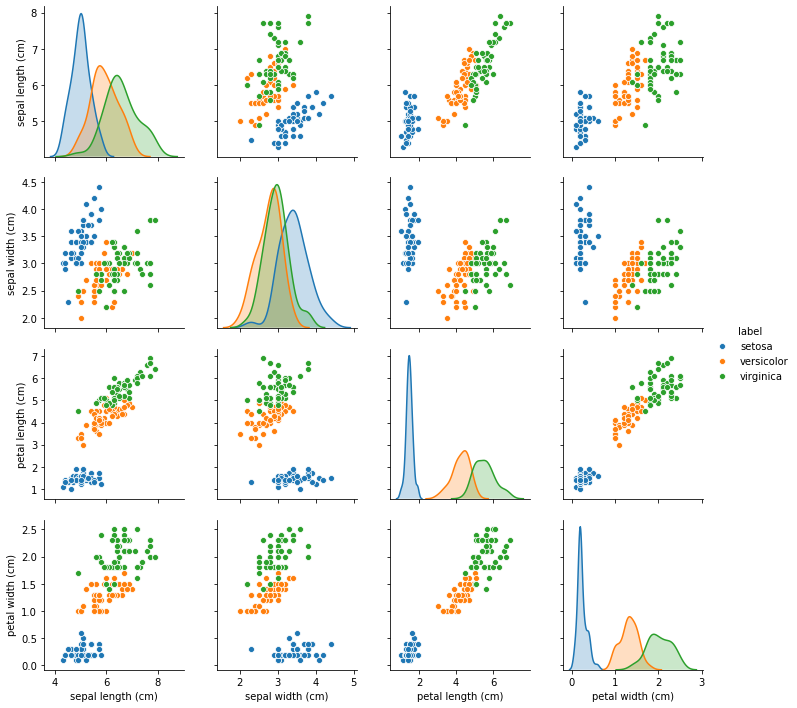

In [ ]:
%matplotlib inline
import seaborn as sns
import pandas as pd

features_df = pd.DataFrame(
    iris['data'],
    columns=iris['feature_names']
)
features_df['label'] = iris['target_names'][iris['target']]
sns.pairplot(features_df, hue='label')

Typically we normalise features input to networks as this helps speed learning up as the loss landscape becomes easier to traverse (for more details see slides 11-13 in [lecture 6 of Geoff Hinton's course](https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)).

In [ ]:
preprocessed_features = (iris['data'] - iris['data'].mean(axis=0)) / iris['data'].std(axis=0)

Next we want to split this into a training and testing split.

**Question**: Why do we want to do this?

First we need to shuffle the data

**Question**: Why do we need to shuffle before splitting it? Hint: take a look at the entire dataset array.

In [ ]:
from sklearn.model_selection import train_test_split

labels = iris['target']
# train_test_split takes care of the shuffling and splitting process
train_features, test_features, train_labels, test_labels = train_test_split(preprocessed_features, labels, test_size=1/3)

Finally, we need to take our numpy arrays and put them into tensors for processing by PyTorch.

In [ ]:
features = {
    'train': torch.tensor(train_features, dtype=torch.float32),
    'test': torch.tensor(test_features, dtype=torch.float32),
}
labels = {
    'train': torch.tensor(train_labels, dtype=torch.long),
    'test': torch.tensor(test_labels, dtype=torch.long),
}

Now we need to create a fully connected layer that takes an input $x$, and trainable weights $W$ and biases $b$ and computes

$$Wx + b$$

PyTorch has a library of common layer types including a fully connected layer, its class name is `Linear` as the layer produces a linear transformation of the input data.

We have a single fully connected layer, but we want to stack these to produce a neural network composed of two layers (a.k.a Multi-layer Perceptron or MLP):

* Input size: 4 features
* Hidden layer size: 100 units
* Output size: 3 classes

We need to put a non-linear function in between these two layers as otherwise the transformation is just as powerful in representational capacity as a linear classifier. We want to produce non-linear decision boundaries as these will better fit our data.

Now we can define a MLP class that brings together 2 fully connected layers with a ReLU on the output of the first layer.

In [ ]:
from torch import nn
from torch.nn import functional as F
from typing import Callable


class MLP(nn.Module):
    def __init__(self,
                 input_size: int,
                 hidden_layer_size: int,
                 output_size: int,
                 activation_fn: Callable[[torch.Tensor], torch.Tensor] = F.relu):
        super().__init__()
        self.l1 = nn.Linear(input_size, hidden_layer_size)
        self.l2 = nn.Linear(hidden_layer_size, output_size)
        self.activation_fn = activation_fn
        
    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        x = self.l1(inputs)
        x = self.activation_fn(x)
        x = self.l2(x)
        return x

Let's deconstruct the signature of the `forward` method

```python
def forward(self, inputs: torch.Tensor) -> torch.Tensor:
    ...
```

`inputs: torch.Tensor` says that the parameter `inputs` is of type `torch.Tensor`. The return type of the method is denoted by `-> torch.Tensor` stating that the method returns a tensor.

We use a generic type `Callable` which defines the type of a function, it has the format `Callable[[args], return_type]`. `activation_fn: Callable[[torch.Tensor], torch.Tensor]` means that `activation_fn` should be a function that takes in a single argument of type `torch.Tensor` and returns a `torch.Tensor`. We've also defined the default value of this parameter to be `F.relu` which is the functional implementation of a rectified linear unit in PyTorch.

Now we can instantiate the MLP class for our problem:

In [ ]:
feature_count = 4
hidden_layer_size = 100
class_count = 3
model = MLP(feature_count, hidden_layer_size, class_count)

Our model produces a scalar value for each class for each example propagated through the network. We need to squash these values into a pseudo-probability distribution. We can do that with the softmax distribution $\mathrm{softmax} : \mathbb{R}^n \rightarrow [0, 1]^n$. It is defined as follows

$$\mathrm{softmax}(\mathbf{x})_i = \frac{e^{\mathbf{x}_i}}{\sum_j e^{\mathbf{x}_j}}$$

This definition results in the output vector summing to one: $$\sum_i\mathrm{softmax}(\mathbf{x})_i = 1$$

To train our network we need some way to measure the error between the output of the network $\mathbf{\hat{p}} : [0, 1]^C$ where $C$ is the number of classes and the label encoded into a one-hot representation $y: \{0, 1\}^C$. We measure the cross-entropy between them:

$$\mathrm{CE}(\mathbf{p}, y) = - \sum_c^C y_c \log(p_c)$$

We'll run a forward pass through the network to compute its predictions which we can then use to compute the loss function.

In [ ]:
logits = model.forward(features['train'])
logits.shape

As you can see `logits` has a shape of (100,3). For each of the 100 data samples we have 3 outputs, one per class. A higher output value (relative to the other values for that data sample) indicates that the model is predicting that class as being more likely.

**Task:** Compute the loss of the `logits` against the training labels `labels['train']` using the [`nn.CrossEntropyLoss`](https://pytorch.org/docs/1.2.0/nn.html#torch.nn.CrossEntropyLoss) class which combines the softmax and cross entopy functions into a single operation. Save this in a variable called `loss`. 

Note that you will have to instantiate the class before you can call it on your logits and labels, like so:

In [ ]:
loss_function = nn.CrossEntropyLoss()

Then you need to call `loss_function` with the `logits` and `labels['train']` to compute the loss

We can now compute the model parameters' gradients by calling `backward()` on the loss.

In [ ]:
loss.backward()

The gradients will be computed and propagated back through the network.

We want to evaluate the quality of our networks predictions, accuracy is an informative metric for a classification task on a balanced dataset.

**Task:** Implement a function to compute accuracy with the following signature

```python
def accuracy(probs: torch.FloatTensor, targets: torch.LongTensor) -> float:
    """
    Args:
        probs: A float32 tensor of shape ``(batch_size, class_count)`` where each value 
            at index ``i`` in a row represents the score of class ``i``.
        targets: A long tensor of shape ``(batch_size,)`` containing the batch examples'
            labels.
    """
    ## First work out which class has been predicted for each data sample. Hint: use argmax
    ## Second count how many of these are correctly predicted
    ## Finally return the accuracy, i.e. the percentage of samples correctly predicted
```    

Your implementation should *not* use any `for` loops, instead you should use the operations defined on tensors like `argmax` and `sum`.

We've also provided some test cases below to verify the correctness of your implementation of `accuracy`.

In [ ]:
def check_accuracy(probs: torch.FloatTensor,
                   labels: torch.LongTensor,
                   expected_accuracy: float):
    actual_accuracy = float(accuracy(probs, labels))
    assert actual_accuracy == expected_accuracy, f"Expected accuracy to be {expected_accuracy} but was {actual_accuracy}"

check_accuracy(torch.tensor([[0, 1],
                             [0, 1],
                             [0, 1],
                             [0, 1],
                             [0, 1]]),
               torch.ones(5, dtype=torch.long),
               1.0)
check_accuracy(torch.tensor([[1, 0],
                             [0, 1],
                             [0, 1],
                             [0, 1],
                             [0, 1]]),
               torch.ones(5, dtype=torch.long),
               0.8)
check_accuracy(torch.tensor([[1, 0],
                             [1, 0],
                             [0, 1],
                             [0, 1],
                             [0, 1]]),
               torch.ones(5, dtype=torch.long),
               0.6)
check_accuracy(torch.tensor([[1, 0],
                             [1, 0],
                             [1, 0],
                             [1, 0],
                             [1, 0]]),
               torch.ones(5, dtype=torch.long),
               0.0)
print("All test cases passed")

All test cases passed


We have our network and a way of computing the error of its output with respect to labels. Now we just need something to optimize the network's weights. We can use stochastic gradient descent (SGD) for this purpose. It is a simple hill descending algorithm, taking a step in the steepest downhill direction (the negative of the gradient) in order to reduce the loss.

We now implement the training that optimizes the network's parameters over the dataset repeatedly. Each iteration through the dataset is known as an *epoch*. It is typical to train networks for anywhere between tens to thousands of epochs.

In [ ]:
from torch import optim


# Define the model to optimze
model = MLP(feature_count, hidden_layer_size, class_count)

# The optimizer we'll use to update the model parameters
optimizer = optim.SGD(model.parameters(), lr=0.05)

# Now we define the loss function.
criterion = nn.CrossEntropyLoss() 

# Now we iterate over the dataset a number of times. Each iteration of the entire dataset 
# is called an epoch.
for epoch in range(0, 100):
    # We compute the forward pass of the network
    logits = model.forward(features['train'])
    # Then the value of loss function 
    loss = criterion(logits,  labels['train'])
    
    # How well the network does on the batch is an indication of how well training is 
    # progressing
    print("epoch: {} train accuracy: {:2.2f}, loss: {:5.5f}".format(
        epoch,
        accuracy(logits, labels['train']) * 100,
        loss.item()
    ))
    
    # Now we compute the backward pass, which populates the `.grad` attributes of the parameters
    loss.backward()
    # Now we update the model parameters using those gradients
    optimizer.step()
    # Now we need to zero out the `.grad` buffers as otherwise on the next backward pass we'll add the 
    # new gradients to the old ones.
    optimizer.zero_grad()
    
# Finally we can test our model on the test set and get an unbiased estimate of its performance.    
logits = model.forward(features['test'])    
test_accuracy = accuracy(logits, labels['test']) * 100
print("test accuracy: {:2.2f}".format(test_accuracy))

epoch: 0 train accuracy: 48.00, loss: 1.22696
epoch: 1 train accuracy: 48.00, loss: 1.03830
epoch: 2 train accuracy: 72.00, loss: 0.90800
epoch: 3 train accuracy: 72.00, loss: 0.82028
epoch: 4 train accuracy: 74.00, loss: 0.75852
epoch: 5 train accuracy: 77.00, loss: 0.71211
epoch: 6 train accuracy: 78.00, loss: 0.67529
epoch: 7 train accuracy: 78.00, loss: 0.64492
epoch: 8 train accuracy: 79.00, loss: 0.61916
epoch: 9 train accuracy: 81.00, loss: 0.59687
epoch: 10 train accuracy: 82.00, loss: 0.57729
epoch: 11 train accuracy: 83.00, loss: 0.55990
epoch: 12 train accuracy: 83.00, loss: 0.54429
epoch: 13 train accuracy: 83.00, loss: 0.53019
epoch: 14 train accuracy: 83.00, loss: 0.51736
epoch: 15 train accuracy: 83.00, loss: 0.50563
epoch: 16 train accuracy: 84.00, loss: 0.49484
epoch: 17 train accuracy: 84.00, loss: 0.48488
epoch: 18 train accuracy: 85.00, loss: 0.47565
epoch: 19 train accuracy: 85.00, loss: 0.46706
epoch: 20 train accuracy: 86.00, loss: 0.45904
epoch: 21 train accurac

**Task:** Try changing the learning rate `lr` passed in to the `optimizer` and see how this effects accuracy on the test set.

---
## Porting Your Network To BC4

Up until this point you've been running your code in a Jupyter notebook on Colaboratory. Whilst this is great for exploration and fiddling with things, it doesn't work well with the way HPC systems work, and also is hard to keep track of changes. We'll take what we've developed so far, and produce a Python script that can train a network and evaluate it.

Copy and paste all the code in the notebook cells needed to run the previous code cell, where we defined the training loop, into a script in your favourite editor and save it with the name `train_fully_connected.py`.

Let's make a folder on BC4 to house all these files rather than putting them into your home directory. 

```console
$ ssh bc4-external
[bc4] $ mkdir -p ~/adl/lab-1
[bc4] $ exit
$ scp train_fully_connected.py bc4-external:~/adl/lab-1/
```

Before running the code we'll have to ensure we have the software set up:

```console
[bc4] $ module load languages/anaconda3/2021-3.8.8-cuda-11.1-pytorch
```

Now that you've copied your script to BC4, and have the software set up, we can run our code by submitting to the computing node.

```console
$ ssh bc4-external
[bc4] $ srun --job-name lab1 --partition teach_gpu --account COMS030144 --nodes 1 --gres gpu:1 --time 0:10:00 --mem 2GB -o ./log_%j.out -e ./log_%j.err python train_fully_connected.py
[bc4] $
```

Equivalently, you can convert the `srun` command into a script, and submit the script to the computing node:

- In the script `train.sh` (you can find it in `./lab-1-dnns/train.sh`):

```
#!/bin/bash

#SBATCH --job-name=lab1
#SBATCH --partition=teach_gpu
#SBATCH --account=COMS030144
#SBATCH --nodes=1
#SBATCH -o ./log_%j.out # STDOUT out
#SBATCH -e ./log_%j.err # STDERR out
#SBATCH --gres=gpu:1
#SBATCH --time=0:10:00
#SBATCH --mem=2GB

module load languages/anaconda3/2021-3.8.8-cuda-11.1-pytorch
echo "Start"
python train_fully_connected.py
```

**Note:** You may need to update the name of the python file to `train_fully_connected.py` or similar depending on what you called your python file.

- Submitting to the computing node:

```
[bc4] $ sbatch train.sh
```

You can find the stdout and stderr of your job in `log_#####.out` and `log_#####.err` respectively.

Up until this point, we have been executing all our code on a CPU. It's time to actually take advantage of those GPUs! PyTorch has a concept of a _device_, this is some piece of hardware that has both memory and compute capabilities. You can transfer tensors and models onto devices using the `to(device)` method defined on `torch.Tensor` and `nn.Module` objects.

**Task:** Modify your code so that

1. Define a device for the computation `device = torch.device('cuda')` at the start of your code
2. Move model to the GPU: `model = model.to(device)` after you define `model = MLP(...)`
3. Move train features to the gpu: `features["train"] = features["train"].to(device)` after defining `features`
4. Move test features to the gpu: `features["test"] = features["test"].to(device)`
5. Move labels to the gpu: `labels["train"] = labels["train"].to(device)` and `labels["test"] = labels["test"].to(device)`

Now rerun the code and see that it runs a little faster. The speed is not that noticeable for such a small network, but when we move to larger networks you'll find the GPU orders of magnitude quicker.

If you get an error similar to `Expected object of device type cuda but got device type cpu` then either the model or the features/labels were not copied over to the gpu. Below we list the common errors you might encounter at this stage and the reasons for these errors. Feel free to ask a TA for help understanding the error you are getting.

`RuntimeError: Expected object of device type cuda but got device type cpu for argument #1 'self'...`\
Your model may still be on the cpu. Make sure you aren't redefining `model` after moving it to the gpu.

`RuntimeError: Expected object of device type cuda but got device type cpu for argument #2 'mat1'...`\
This means `features['train']` or `features['test']` is likely still on the cpu.

`RuntimeError: Expected object of device type cuda but got device type cpu for argument #2 'target'...`\
This means `labels['train']` is likely still on the cpu.

`RuntimeError: expected device cuda:0 but got device cpu`\
Depending on your implementation, this may mean `labels['test']` is still on the cpu

`NameError: name 'device' is not defined`\
Make sure `device = torch.device('cuda')` is before any of the other lines which use `device`


---

## Logging Performance Metrics

To monitor training, use Tensorboard, a real-time graphing tool to emerge from the TensorFlow project. With tensorboard you can log metrics in real time from a python script and visualise them in a web browser.

PyTorch has native support for tensorboard (as of 1.1.0). There are two parts to tensorboard
1. A `SummaryWriter`, this is an object you'll instantiate in your code, you can use it to log tensors, scalars, images, audio, and more. It will serialise and write these objects to disk into a log directory.
2. The `tensorboard` executable which launches a web server that provides an interface graphing the data that you have logged.

Let's log the training accuracy and loss.

First we need to import `SummaryWriter` and instantiate it.

```python
from torch.utils.tensorboard import SummaryWriter

summary_writer = SummaryWriter('logs', flush_secs=5)
```

Now **within the training loop**, log the scalar accuracy value and training loss:

```python
train_accuracy = accuracy(logits, labels['train']) * 100
summary_writer.add_scalar('accuracy/train', train_accuracy, epoch)
summary_writer.add_scalar('loss/train', loss.item(), epoch)
```

Close the writer **outside** the training loop

```python
summary_writer.close()
```

Now run your code again, you should have a `logs` directory in your working directory. This contains the values written by the summary writer. We can visualise these using `tensorboard`. 

To do so, we'll run `tensorboard` on a BC4, but we'll need to forward the TCP port to your own computer. 

```console
[bc4-compute-node] $ PORT=$((($UID-6025) % 65274))
[bc4-compute-node] $ echo $PORT
<PORT>
[bc4-compute-node] $ hostname -s
<HOSTNAME>
[bc4-compute-node] $ tensorboard --logdir logs --port $PORT --bind_all
TensorBoard 1.14.0 at http://<HOSTNAME>.acrc.bris.ac.uk:<PORT>/ (Press CTRL+C to quit)
```


**Note** If you get an issue with `tensorboard: command not found`, this is because you haven't loaded the unit's module. Simply run
```console
[bc4] $ module load languages/anaconda3/2021-3.8.8-cuda-11.1-pytorch  
```
to load it.

To avoid having to do this every time you log in to BC4, append it to your `~/.bashrc` file by running

```console
[bc4] $ echo "module load languages/anaconda3/2021-3.8.8-cuda-11.1-pytorch" > ~/.bashrc
```

Open up a new console window on your laptop and run the following, replacing `<HOSTNAME>` and `<PORT>` with those obtained above.

```console
$ ssh -N -L 6006:<HOSTNAME>:<PORT> bc4-external
```

- `-N` tells SSH not to create a new terminal session on the remote host
- `-L <local-port>:<remote-address>:<remote-port>` tells SSH to forward traffic on port `<local-port>` on your machine to port `<remote-port>` on the machine at `<remote-address>`.

Now visit http://localhost:6006, you should see something similar to the screen below

![Tensorboard landing page](./media/tensorboard-landing-page.png)

The x-axis is the number of steps we've trained for.

By default tensorboard smoothes your data by computing a running average. You can adjust this smoothing using the slider in the left side bar. We'd recommend turning this off to begin with as the smoothing can be deceptive and hide issues with training.

**Congratulations.** 

You've trained your first NN model. This concludes the first lab. 

# END of Lab 1

If you would like to learn more, we offer additional extensions below.


---

# Optional Extension: Implementing library functions

Read on if you wish to open the black box and better understand how the library functions you used are implemented.

## Implementing ReLU 
We used the ReLU function as the non linearity in our network.

$$\mathrm{ReLU}(\mathbf{x}) = \max(\mathbf{x}, \mathbf{0})$$

How is this implemented?

First we compute a binary tensor indicating which elements are less than 0 by doing an element-wise comparison. We then use this as a mask to set those elements of the vector to 0.

In [ ]:
def relu(inputs: torch.Tensor) -> torch.Tensor:
    # We take a copy of the input as otherwise we'll be modifying it in
    # place which makes it harder to debug.
    outputs = inputs.clone()  
    outputs[inputs < 0] = 0
    return outputs

**Task:** Test the `relu` function with a randomly generated tensor to check that all the values that are less than 0 are set to 0. Additionally, check that the input to the `relu` function wasn't modified (i.e. a new tensor was produced). This is a common implementation bug where you pass a tensor to a function expecting it to be idempotent, but it actually modifies its input. It is more memory efficient to compute ReLU in place but you have to be careful that you don't mind updating the tensor input to the function.

## Implementing Softmax and Cross entropy
We used the softmax function to squash our raw network outputs from the range $\mathbb{R}^n \rightarrow [0, 1]^n$. Implementing softmax is quite interesting as the naive implementation that is a direct translation of the equation suffers from numerical stability problems.

**Task:** Implement softmax and cross entropy exactly as they are defined below with the signatures `softmax(logits: torch.Tensor) -> torch.Tensor` and `cross_entropy(logits: torch.FloatTensor, labels: torch.LongTensor) -> torch.FloatTensor`


$$\mathrm{softmax}(\mathbf{x})_i = \frac{e^{\mathbf{x}_i}}{\sum_j e^{\mathbf{x}_j}}$$

$$\mathrm{CE}(\mathbf{p}, y) = - \sum_c^C y_c \log(p_c)$$

Replace the definition of `criterion` in the training loop with 
```python
criterion = lambda logits, ys: cross_entropy(softmax(logits), ys)
```

### Supplementary material

The following notebooks walk through *optional* material.

1. [Local Jupyter Lab setup](../misc/local-environment-setup.ipynb) - How to install Jupyter and set up your environment for exploring pytorch on your own machine.
2. [Autodifferentiation in pytorch](../misc/autograd-explanation.ipynb) - An explanation of how PyTorch performs auto differentiation.